# Week 13 Day 1: Review

| Week | Monday                       | Wednesday                  | Friday              |
|------|------------------------------|----------------------------|---------------------|
| 1  | 8-27  Introduction             | 8-29 Using Python part 1   | 8-31 Using Python part 2 |
| 2  | 9-03  *Labor day*              | 9-05 OO programming (4)    | 9-07 Error accumulation (2) |
| 3  | 9-10  Numerical tools          | 9-12 Plotting (3)          | 9-14 Using git |
| 4  | 9-17  Random numbers (5)       | 9-19 Monte Carlo (5)       | 9-21  **Project selection** |
| 5  | 9-24  Integration rules (6)    | 9-26 MC Integration (6)    | 9-28 Numerical differentiation (7) |
| 6  | 10-01 Vectorization (8)        | 10-03 Linear algebra (8)   | 10-05 Linear regression (8) |
| 7  | 10-08 Structured tabular data  | 10-10 Cuts and histograms  | 10-12 *Fall reading days* |
| 8  | 10-15 Generating distributions | 10-17 Minimization and fitting | 10-19 Fitting tools |
| 9  | 10-22 Confidence intervals     | 10-24 Markov Chain Monte Carlo | 10-26 Performance computing (14) |
| 10 | 10-29 Intro to ODEs (9)        | 10-31 Runge–Kutta algorithm (9) | 11-02 Solving ODE problems (9) |
| 11 | 11-05 Fourier Series (10)      | 11-07 Fast Fourier Transform (10) | 11-09 **Project progress report** |
| 12 | 11-12 *Veterans day*           | 11-14 **Project progress report** | 11-16 Filtering signals (10) |
| 13 | 11-19 **Review**               | 11-21 **Student requested topics** | 11-23 *Thanksgiving* |
| 14 | 11-26 Static computation graphs | 11-28 Applied ML topics | 11-30 Sharing and documenting code |
| 15 | 12-03 **Term project presentations** | 12-05 **Term project presentations** | 12-07 **Term project presentations** |

In [1]:
import math
import numpy as np
import numba
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate, optimize, stats, misc

## 2.3: Error accumulation

Compare several summing methods to the very accurate "fsum"; which fairs best?

<!--
print(fsummed - sum(vals))
print(fsummed - np.sum(vals))
-->

In [2]:
np.random.seed(42)
vals = np.random.normal(0, 1, 1_000_000)

In [3]:
fsummed = math.fsum(vals)

## 3.3: Using git

Describe the following commands:

1. `git add -u .`
2. `git commit -m "hello"`
3. `git push`
4. `git grep "hello"`

<!--
1) Adds all changes (not new files) in the current directory or below into the staging area
2) Saves the staging area into history locally, with a message of "hello"
3) Pushes changes in history to a remote (like github)
4) Looks for the phrase "hello" in the current repository
-->

## 4.1: Integration rules

Integrate the following function. You *should* use tools provided; don't write your own integrator unless it is necessary for some reason!

$$
f(x) = \int _0 ^1 \sin(\cos x) \, dx \approx 0.73864...
$$

(From [Wolfram Alpha](https://www.wolframalpha.com/input/?i=integrate+sin(cos+x)+from+x%3D0+to+1&lk=3))

<!--
integrate.quad(f,0,1)[0]
-->

In [4]:
def f(x):
    return np.sin(np.cos(x))

## 4.2: MC Integration

What situations would you want to use MC integration instead of a regular grid and an integration rule?

Integrate the above function with MC. Note there is not a built in function to do so, since it's so easy to do.

<!--
arr = np.random.rand(10_000_000)
np.mean(f(arr))
-->

## 4.3: Numerical differentiation

Can you find a numerical derivative for the function above at 1/2? Analytic solution shown.

<!--
misc.derivative(f, .5, .00001)
(f(.50001)-f(.49999)) / .00002
-->

In [5]:
real_deriv = -np.cos(np.cos(0.5)) * np.sin(0.5)
real_deriv

-0.30635890918999453

## 5.3, 8.2, 8.3 : Fitting

We've already done a bit of this, so let's just hit a highlight or two.

Functions:

* Interpolation: connect the dots. Cubic splines were probably the nicest visual interpolation method.
* Linear regression: `np.polyfit` or `np.linalg.lstsq`
* Non-linear least squares: `optimize.curve_fit`

Distributions:

* Binned fits: See above, be careful and include error
* Unbinned fits: NLL (use `optimize.minimize` or custom package)

Try a quick polyfit here:

<!--
c = np.polyfit(x,y,1)
yy = np.poly1d(c)(x)
...
plt.plot(x,yy)
print(*c)
-->

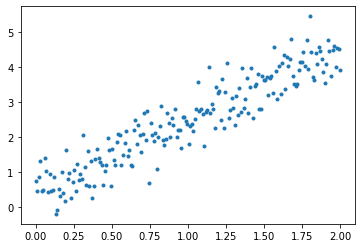

In [6]:
np.random.seed(42)
x = np.linspace(0, 2, 200)
y = x * 2 + 0.5 + np.random.normal(0, 0.5, 200)

# Add fit here

plt.plot(x, y, ".")

## 6.1, 6.2: Structured tabular data and cuts

Play with the following dataframe. Make a scatter plot of `sepal_width` vs. `sepal_length` with each of the three species a different color.

<!--
sp = df.groupby('species')
print(*sp.groups.keys())
#
for name, group in sp:
    locals()[name] = group
#
plt.plot('sepal_length', 'sepal_width', '.', data=setosa, label='setosa')
plt.plot('sepal_length', 'sepal_width', '.', data=versicolor, label='versicolor')
plt.plot('sepal_length', 'sepal_width', '.', data=virginica, label='virginica')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(title='Species')
plt.show()
-->

In [7]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Note, we could do this with seaborn:

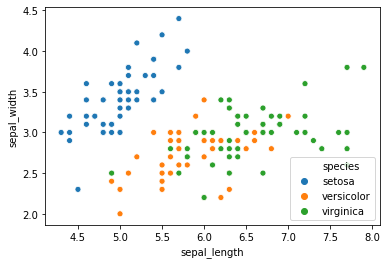

In [8]:
sns.scatterplot("sepal_length", "sepal_width", "species", data=df)

## 9.2: MCMC

Let's look at the metropolis algorithm (MCMC but without computing a posterior, so simpler) to produce samples from $\sin(x)**2 / x**2$

In [9]:
def p(x):
    return np.sin(x) ** 2 / x ** 2

Normalization not needed for algorithm, but makes the plots line up:

In [10]:
integ, err = integrate.quad(p, -15, 15.000001)
print(integ, err)

3.07712984526598 1.2636296904677824e-09


In [11]:
x1 = np.linspace(-15, 15, 400)
y1 = p(x1) / integ

Now compute the metropolis algorithm:

<!--
@numba.njit
def metro(p, samples, sigma):
    x = np.zeros(samples+1)
    x[0] = np.random.rand()
#
    for i in range(samples):
        # suggest new position
        x_Star = np.random.normal(x[0], sigma)
#
        # Compute alpha - the fractional chance of moving to a new point
        alpha = p(x_Star)/p(x[i])
#
        # Accept/reject based on alpha
        accept = alpha > np.random.rand()
#
        # Add the current (moved?) point
        x[i+1] = x_Star if accept else x[i]
#
    return x
-->

In [12]:
samples = 100_000
sigma = 10
x = np.empty(samples + 1)
x[0] = np.random.rand()

for i in range(samples):
    # suggest new position xStar
    ...

    # Compute alpha - the fractional chance of moving to a new point
    ...

    # Accept/reject based on alpha
    ...

    # Add the current (moved?) point
    ...

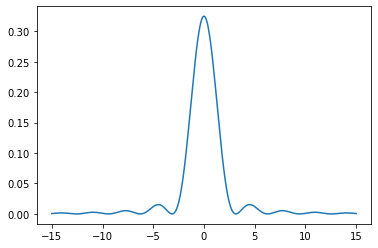

In [13]:
plt.plot(x1, y1)
# plt.hist(x[500:], density=True, bins=100)
# plt.yscale('log')
plt.show()

Side project: This is great, but very slow. We can make this a function, and add a couple of `@numba.njit`'s, and get a massive speedup!

## 10.2: Runge-Kutta algorithms

Let's look at ODEs, and revisit the RK2 algorithm. Remember you can do the following:

$$
\mathbf{u} =
\left(
\begin{matrix}
\dot{x} \\
x
\end{matrix}
\right)
$$

$$
\mathbf{f}(t, \mathbf{u}) =
\dot{\mathbf{u}}
$$

To get a first order ODE.

We'll start with one, though:

$$
u =
\left(
\begin{matrix}
x \\
y \\
z
\end{matrix}
\right)
$$

$$
\dot{u} =
\left(
\begin{matrix}
\sigma (y - x) \\
\rho x - x z - y \\
x y - \beta z
\end{matrix}
\right)
$$

Constants given below. (example from [Bokeh](https://bokeh.pydata.org/en/latest/docs/gallery/lorenz.html))

In [14]:
sigma = 10
rho = 28
beta = 8 / 3
theta = 3 * np.pi / 4


def lorenz(t, xyz):
    x, y, z = xyz
    x_dot = sigma * (y - x)
    y_dot = x * rho - x * z - y
    z_dot = x * y - beta * z
    return np.array([x_dot, y_dot, z_dot])

In [15]:
initial = (-10, -7, 35)
t = np.arange(0, 50, 0.006)

#### RK2

In [16]:
def rk2_ivp(f, init_y, t):
    steps = len(t)
    order = len(init_y)

    y = np.empty((steps, order))
    y[0] = init_y

    for n in range(steps - 1):
        h = t[n + 1] - t[n]

        k1 = h * f(t[n], y[n])  # 1.1
        k2 = h * f(t[n] + h / 2, y[n] + k1 / 2)  # 1.2

        y[n + 1] = y[n] + k2  # 1.0

    return y

In [17]:
xyz = rk2_ivp(lorenz, initial, t)
xprime = np.cos(theta) * xyz[:, 0] - np.sin(theta) * xyz[:, 1]

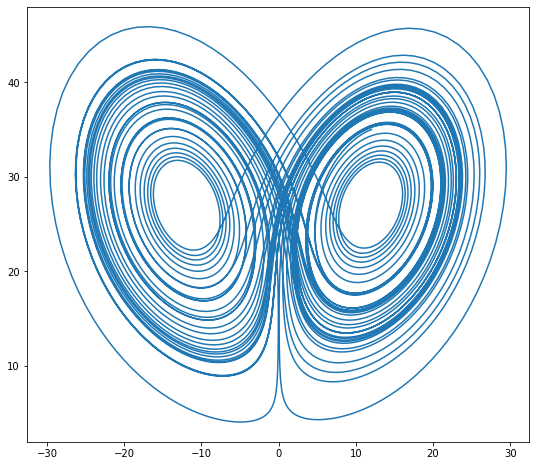

In [18]:
plt.figure(figsize=(9, 8))
plt.plot(xprime, xyz[:, 2])
plt.show()

#### RK4

In [19]:
def rk4_ivp(f, init_y, t):
    steps = len(t)
    order = len(init_y)

    y = np.empty((steps, order))
    y[0] = init_y

    for n in range(steps - 1):
        h = t[n + 1] - t[n]

        k1 = h * f(t[n], y[n])  # 2.1
        k2 = h * f(t[n] + h / 2, y[n] + k1 / 2)  # 2.2
        k3 = h * f(t[n] + h / 2, y[n] + k2 / 2)  # 2.3
        k4 = h * f(t[n] + h, y[n] + k3)  # 2.4

        y[n + 1] = y[n] + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)  # 2.0

    return y

In [20]:
xyz = rk4_ivp(lorenz, initial, t)
xprime = np.cos(theta) * xyz[:, 0] - np.sin(theta) * xyz[:, 1]

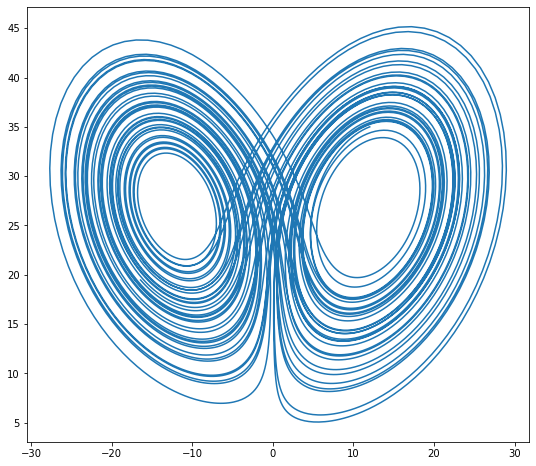

In [21]:
plt.figure(figsize=(9, 8))
plt.plot(xprime, xyz[:, 2])
plt.show()

#### Solve IVP

In [22]:
res = integrate.solve_ivp(lorenz, (0, 100), initial, t_eval=t)
xprime = np.cos(theta) * res.y[0] - np.sin(theta) * res.y[1]

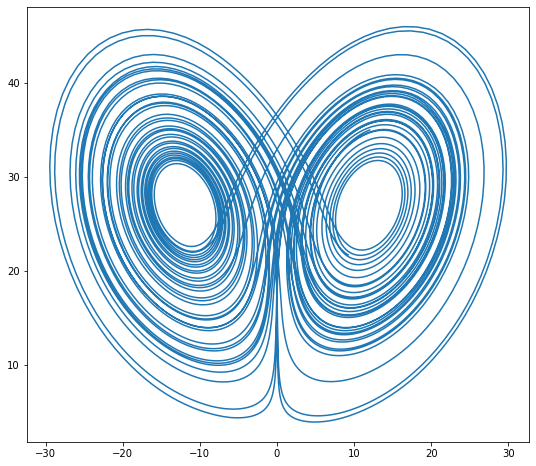

In [23]:
plt.figure(figsize=(9, 8))
plt.plot(xprime, res.y[2])
plt.show()

#### Ode Int

Let's try this with ODE Int, since that's in older SciPy's. The main difference is the reversed order for f, and

In [24]:
def lorenz_flip(xyz, t):
    return lorenz(t, xyz)


xyz = integrate.odeint(lorenz_flip, initial, t)
xprime = np.cos(theta) * xyz[:, 0] - np.sin(theta) * xyz[:, 1]

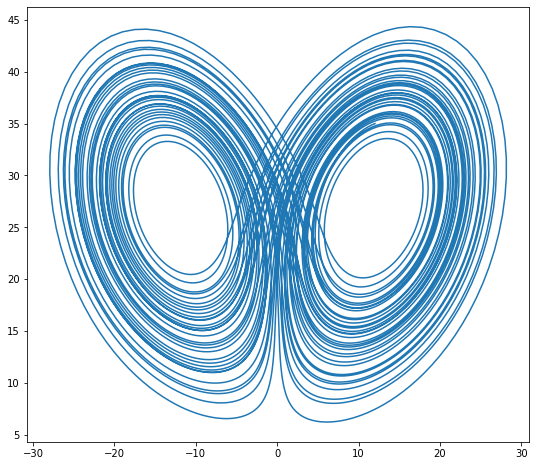

In [25]:
plt.figure(figsize=(9, 8))
plt.plot(xprime, xyz[:, 2])
plt.show()